# **Introduction to Machine Learning: Decision Trees**

# Overview
***Introduction Video***

It's important to note that there are other machine learning techniques, but the aim of this notebook will be to have a basic understanding of one of the fundamental techniques used: Decision Tree. This is ideal because Decision Trees are the basis for more complex models such as Boosted Trees or Random Forests. Below we have a general introduction video to machine learning by Lorena Benitez.


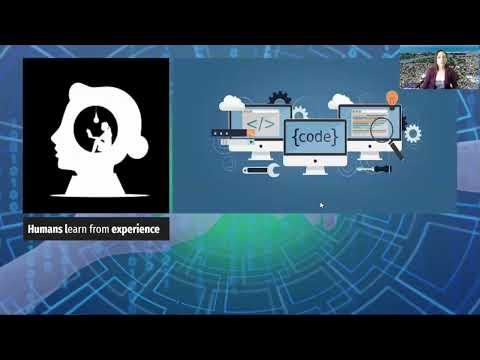

In [2]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('e3tGQykFC5M', width=800, height=400)

# Learning Objectives

By the end of this module, you will be able to: 
- Understand decision trees
    - Define what a decision tree is and explain its role as a supervised machine learning model. 
- Prepare and explore Data 
    - Load, inspect, and preprocess datasets using Python libraries. 
    - Separate data into features and labels, understanding the significance of each. 
- Train and visualize models
    - Create and train a decision tree model using scikit-learn library. 
    - Visualize the structure of a trained Decision Tree and interpret its decision-making process. 
- Make predictions and evaluate performance 
    - Use the trained decision tree model to make predictions on new data. 
    - Compare predicted values to actual values using visual tools and calculate metrics such as Root Mean Square Error (RMSE) to assess model accuracy. 
- Apply to Real-World Data
    - Implement decision trees on real-world datasets, such as COVID-19 data from California. 
    - Understand the pratical implications and limitations of using decision trees for predictive modeling. 

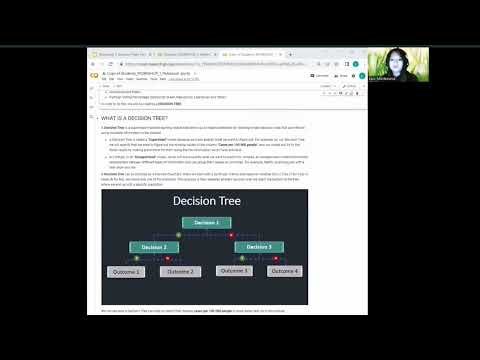

In [3]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('_kAjJ8rJwfU', width=800, height=400)

We are going to be working with **COVID data** from the 58 counties of California during Summer 2020 (July, August, and September).  

**Remember the complete dataset with 58 counties from the previous video of this workshop?** 

Let's now imagine that we did not know the **cases per 100,000 people** for the last 18 counties of the dataset. 

![Features-for-Prediction.jpg](images/Features-for-Prediction.jpg)

**The objective** of this exercise will be to make predictions for these missing values in the column **cases per 100,000 people** based solely on the data that we do have available.

The information that we still have available for these 18 counties are:

*   Population
*   Vaccination Percentage (Partial and Fully vaccinated)
*   Unemployment Rates
*   Partisan Voting Percentage (Democrat, Green, Republican, Libertarian, and Other)

In order to do this, we will be creating a **DECISION TREE**

## WHAT IS A DECISION TREE?

 A **Decision Tree** is a supervised machine learning model that allows us to make predictions by learning simple decision rules that are inferred using available information in the dataset. 
 
- A Decision Tree is called a **supervised**  model because we know exactly what we want to figure out. For example, for our Decision Tree, we will specify that we want to figure out the missing values of the column **cases per 100,000 people**, and our model will try to find these values by making predictions for them using the the information we do have available.

- In contrast, in an **unsupervised**  model, we do not know exactly what we want to predict. Instead, an unsupervised model finds hidden relationships between different types of information and can group them based on similarities. For example, Netflix surprising you with a new show you like.

A **Decision Tree** can be pictured as a tree-like flowchart, where we start with a particular criteria and based on whether this is True (Y for Yes) or False (N for No), we chose only one of the branches. This process is then repeated at every decision until we reach the bottom of the tree, where we end up with a specific prediction. 

![General-Decision-Tree.png](images/General-Decision-Tree.png)

We will see how a Decision Tree can help us predict the missing **cases per 100,000 people** in more detail later on in this tutorial.

You can find more information about different ways to classify machine learning models here: [Machine Learning Models](https://www.geeksforgeeks.org/introduction-machine-learning/?ref=lbp)

You can find more information about Decision Trees here: [Scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

In [5]:
!pip install jupyterquiz==2.0.7 --quiet
from jupyterquiz import display_quiz

display_quiz('quiz_files/quiz1.json')

<IPython.core.display.Javascript object>

# Prerequisites

***Data Sources***

- [COVID cases data (California Health and Human Services Agency)](https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a)
- [COVID vaccination data (Los Angeles Times)](https://github.com/datadesk/california-coronavirus-data)
- [Unemployment data (California Employment Development Dept.)](https://data.edd.ca.gov/Labor-Force-and-Unemployment-Rates/Local-Area-Unemployment-StatisticsdecisionLAUS-/e6gw-gvii)
- [Election data (Harvard University)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)

***Libraries/Packages***
   
- IPython.display
- jupyterquiz==2.0.7
- graphviz 
- pandas
- numpy
- sklearn
- matplotlib



***<span style="font-size:0.8em;"> \* If the libraries/packages have not been installed:</span>***

<span style="font-size:0.8em;"> Use !pip install <library/package name> or 
!conda install -c anaconda <library/package name> -y </span>

<span style="font-size:0.8em;"> replacing <library/package name> with the library or package name you are trying to download </span>

# Get Started



### Step 1) Importing necessary packages into the notebook


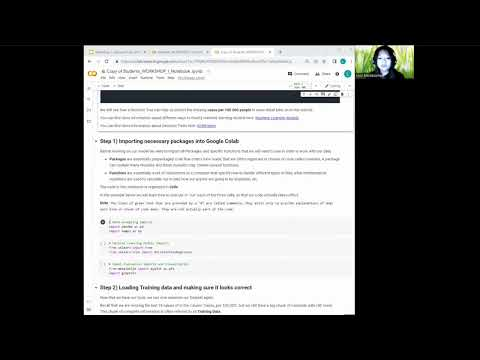

In [7]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('jPIQbpdTkbM', width=800, height=400)

Before working on our model we need to import all packages and specific functions that we will need to use in order to work with our data. 

- **Packages** are essentially prepackaged code that others have made, that are often organized in chunks of code called modules. A package can contain many modules and these modules may contain several functions. 

- **Functions** are essentially a set of instructions to a computer that specify how to handle different types of files, what mathematical equations are used to calculate our model, how our graphs are going to be displayed, etc. 

The code in this notebook is organized in **cells**

In the example below we will learn how to execute or "run" each of the three cells, so that our code actually takes effect. To run the code in a cell, select the cell and press the "play" button on the upper part of the notebook menu. 

**Note**: The lines of green text that are preceded by a "#" are called comments, they exist only to provide explanations of what each line or chunk of code does. They are not actually part of the code.

In [ ]:
# Data Wrangling Imports
import pandas as pd
import numpy as np

In [ ]:
# Machine Learning Models Imports
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
# Model Evaluation Imports and Visualization
from matplotlib import pyplot as plt
!pip install graphviz
!conda install -c anaconda graphviz -y
import graphviz
# Quantitative metrics of Model performance
from sklearn.metrics import mean_squared_error

### Step 2) Loading training data and making sure it looks correct

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('z9dcLYg65uk', width=800, height=400)

Now that we have our tools, we can now examine our dataset again. 

Recall that we are missing the last 18 values in the column "cases per 100,000", but we still have a big chunk of complete data (40 rows). This chunk of complete information is often referred to as **training data**.

![Training-Data.jpg](images/Training-Data.jpg)

**Training data** is a machine learning term that refers to the dataset used to teach our Decision Tree to make the predictions for our missing values using available data.

**A)** Let's start by loading our training data into the notebook:

The data that you need for these lessons are stored in a Google Cloud Storage bucket. Before you begin these files will need to be copied from the bucket to your notebook using the `gsutil` utility. For more information, see [NIH CloudLab's documentation](https://scan.cloud.nih.gov/resources/cloudlab/google-cloud-jumpstart/#cli).

In [ ]:
# Download the data from Google Cloud Storage with gsutil
!gsutil cp gs://nigms-sandbox/nosi-sfsu/data/* .

In [ ]:
# This opens the file that contains the training data, data used to train the algorithm 
S2020_training = pd.read_csv("S2020_training.csv")

**B)** Make sure that your dataset is loaded correctly, it should contain the county names and all the data highlighted in green shown in our last picture:

In [ ]:
# This will display the entire dataset 
S2020_training

**C)** We can sneak a peek at what our first 5 rows look like, if your dataset is too big to be displayed.

In [ ]:
# This will display only the first 5 rows of our dataset
S2020_training.head()

**D)** Here we can see how many rows and columns the complete dataset actually has. In our example we should have (40 rows, 11 columns)

In [ ]:
# This will display only the number of rows (not including the title of the columns) and number of colums of our dataset
S2020_training.shape

### Step 3) Separate the training dataset into features and labels

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('qh8C0QRECWU', width=800, height=400)

Recall that a Decision Tree is a **supervised** machine learning model, therefore we need to specify clearly what we are trying to predict.

To do this we need to divide the training data into **labels** and **features**

![Label-and-Features.jpg](images/Label-and-Features.jpg)

- The RED outlined column is called a **LABEL**. This is a machine learning term that refers to the data that our model will learn to predict.

- The BLUE outlined columns are called **FEATURES**, which is the term that refers to the columns we would like to use to predict our chosen LABEL. 

Because the **training data** is complete, we can clearly separate LABEL from FEATURES. Remember that the training data is only the red and blue shaded regions of our dataset. 

We can ignore the rest of the dataset for now.

**A)** Separate the training data into features and labels:

In [ ]:
# On the other hand the label will only include summer_2020 cases per 100 000
S2020_training_labels = S2020_training["cases_per_100000"]

# Notice that in this code we are droping the "county" column, because it does not contribute with our predictions and "cases_per_100000" because that is our label
S2020_training_features = S2020_training.drop(columns=["county","cases_per_100000"])

**B)** Run the **LABEL** to check that the separation was correctly performed (you should see 40 rows and just 1 column):

In [ ]:
# This code allows you to see what the labels look like as a dataframe, after being separated from the training data
S2020_training_labels = pd.DataFrame(S2020_training_labels,columns = ["cases_per_100000"])

# This code tells you how many rows and columns this dataset has
S2020_training_labels.shape

**C)** Run the **FEATURES** to check that the separation was correctly performed (you should see all 40 rows and 9 columns only since we dropped the columns of "county" and "cases_per_100000")

In [ ]:
# This code shows
S2020_training_features.shape

In [ ]:
display_quiz('quiz_files/quiz2.json')

### Step 4) Create a Decision Tree object and train it

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('M6gY_JywOys', width=800, height=400)

After separating our training data into features and labels, we can now create a Decision Tree. 

**A)** Create a Decision Tree object

In [ ]:
# This line creates the Decison Tree with your chosen specifications (what is written within the parentheses)
dtr_summer2020 = DecisionTreeRegressor(random_state = 1, max_depth= 3)

**B)** Train our Decision Tree using the training data we separated in the previous step

In [ ]:
# This line trains the decision tree using both the features and the label from our training data
dtr_summer2020 = dtr_summer2020.fit(S2020_training_features,S2020_training_labels)

### Step 5) Visualize our trained Decision Tree

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('cFk6vmfU48w', width=800, height=400)

Visualize our Decision Tree by graphing it using the following code 

In [ ]:
# Initialize tree data object 
dtr_summer2020_dot = tree.export_graphviz(dtr_summer2020, out_file=None, 
                                feature_names=S2020_training_features.columns,  
                                filled=False, rounded=True, impurity=False)

# Draw graph
dtr_graph = graphviz.Source(dtr_summer2020_dot, format="png") 
dtr_graph

### Let's try to understand what our tree learned!

- **NODES** contain the decision that must be made based on a particular criteria. You can see that nodes have 2 arrows pointing away from them. All arrows to the LEFT are taken when the criteria is satisfied, and all arrows to the RIGHT are taken when this criteria is not satisfied.

- **ROOT NODE**, this node is what our model determined as the most important feature to consider when making our predictions. It tells you the feature that best splits the data and it's located at the top of the tree.

- **LEAVES** contain the final outcome of the decision path. You can see that leaves do not have arrows pointing away from them.

### Step 6) Make predictions using Testing data with our trained Decision Tree

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('LtD93dB5JzU', width=800, height=400)

We are now ready to make predictions for the counties that had the missing labels.

**Below is an image showing what constitutes the testing data in our example**

![Testing-Data.jpg](images/Testing-Data.jpg)
 
In machine learning we usually call the part of the dataset that only contains the FEATURE columns as **testing data**. 

The **testing data** is the dataset that is used to predict the missing values of the LABEL column, based on the rules learned during the training phase.

Recall that our Decision Tree model has only been taught using the training data (40 counties) and has never seen any of the columns of the testing data (18 counties).

**A)** Let's load the testing data that correspond to the counties with the missing label and see what it looks like.

In [ ]:
# This opens the file that contains the testing data features, features = data used to make a prediction
S2020_testing_features = pd.read_csv("S2020_test_features.csv")

# This lets you see the loaded testing data 
S2020_testing_features

**B)** Lets drop the county names from the dataset and make our predictions!

In [ ]:
# This drops the "county" column from our test dataset
S2020_features_test_nocounty = S2020_testing_features.drop(columns=["county"])

# This uses the tree we created and makes the predictions
S2020_labels_pred = dtr_summer2020.predict(S2020_features_test_nocounty)

**C.1)** Let's look at what labels our model predicted and check how it relates to our Decision Tree:

![COVID-Decision-Tree.PNG](images/COVID-Decision-Tree.PNG)

In [ ]:
# This turns our predictions (which is currently an array) into a dataframe 
S2020_labels_preds_df = pd.DataFrame(S2020_labels_pred, columns=["Predicted"])

# This line adds the county name back, so that you can see what was predicted for each county
S2020_labels_preds_df = pd.concat([S2020_testing_features["county"].reset_index(drop=True),S2020_labels_preds_df.reset_index(drop=True)],axis=1)

# This lets us see what was predicted
S2020_labels_preds_df.round(3)

**C.2)** Why did the model predict 702.806 for San Francisco County?

Run the cell bellow and look at the output, follow the tree as described in the video to see that this county has: 
- Unemployment Rate =< 0.123
- Population > 28453.0
- Green_votes_percentage > 0.005

Feel free to try another county and check for yourself that it follows these rules, by changing the county name in the code below:

In [ ]:
# Loading the testing features for San Francisco County
S2020_testing_features[S2020_testing_features['county']=='San Francisco'] # change 'San Francisco' to any other county in the list above that you are interested in

In [ ]:
display_quiz('quiz_files/quiz3.json')

### Step 7) Let's see how our Decision Tree model performed

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('0VK4sLz2wrc', width=800, height=400)

Now that we have predicted the missing labels for Summer 2020 cases, let's see how our model did by comparing it with the actual labels!

**A)** Let's reveal now our ACTUAL labels by loading them into the notebook

In [ ]:
# This opens the file that contains the testing data labels, label = what we want to predict
S2020_testing_labels = pd.read_csv("S2020_test_labels.csv")

# This drops the county on our label data so that the dataframe only has one column with county names when is joined with the predicted dataframe
S2020_testing_labels = S2020_testing_labels.drop(columns=["county"])

**B)** We can use a bar graph to help us visually inspect how our model performed

In [ ]:
# This puts into a single dataframe our predictions with our original test labels 
pred_vs_test_2020 = pd.concat([S2020_testing_labels.reset_index(drop=True),S2020_labels_preds_df.reset_index(drop=True)],axis=1)

# Reorganize the order of columns
pred_vs_test_2020 = pred_vs_test_2020.loc[:,["county", "cases_per_100000","Predicted"]]

# This plots the data in a barchart per county
pred_vs_test_plot = pred_vs_test_2020.plot.barh(color={"Predicted": "orange", "cases_per_100000": "darkblue"},x="county",figsize=(15,15), yticks=np.arange(0,4000,500))


### Step 8) Let's try using our Summer 2020 tree model to predict 2021 data

In [ ]:
#Run the command below to watch the video
from IPython.display import YouTubeVideo

YouTubeVideo('2r3ZpwM6xDQ', width=800, height=400)

**A)** Let's load the features information for the same 18 counties, but this time for Summer 2021.

In [ ]:
# Importing Summer 2021 data to predict using "Summer2020 Model"
S2021_testing_features = pd.read_csv("S2021_test_features.csv")

# Make predictions for Summer 2021 Data
S2021_labels_pred = dtr_summer2020.predict(S2021_testing_features.drop(columns=["county"]))

**B)** Let's now load the actual Summer 2021 data and see how our 2020 Decision Tree model performed this time.

In [ ]:
# Importing labels of Summer 2021 data to check accuracy of "Summer2020 Model" predicting Summer2021 Data
S2021_testing_labels = pd.read_csv("S2021_test_labels.csv")

# This turns our predictions (which is currently an array) into a dataframe 
S2021_labels_preds = pd.DataFrame(S2021_labels_pred, columns=["Predicted"])

# This puts into a single dataframe our predictions with our original test labels 
pred_vs_test_2021 = pd.concat([S2021_testing_labels.reset_index(drop=True),S2021_labels_preds.reset_index(drop=True)],axis=1)

# Visualize performance for Summer 2021 predictions
pred_vs_test_plot = pred_vs_test_2021.plot.barh(color={"Predicted": "orange", "cases_per_100000": "teal"},x="county",figsize=(15,15), yticks=np.arange(0,4000,500))

**C)** Another way to look at the difference in performance between predictions made by the model for 2020 vs 2021 data is to observe their difference in errors.

We can see that for 2020 the histogram (Blue) of errors is closer overall to 0 ranging from -500 to 500, whereas the histogram of errors for 2021 (Orange) are all over the place ranging from -1000 to 2500

In [ ]:
# Create columns holding error between actual rate vs. predicted rate
pred_vs_test_2020['residual'] = pred_vs_test_2020['cases_per_100000'] - pred_vs_test_2020['Predicted']
pred_vs_test_2021['residual'] = pred_vs_test_2021['cases_per_100000'] - pred_vs_test_2021['Predicted']

# Plot errors on histogram
plt.title('Cases per 100k Prediction Errors')
plt.hist(pred_vs_test_2020['residual'], alpha=0.5, label='2020 data')
plt.hist(pred_vs_test_2021['residual'], alpha=0.5, label='2021 data')
plt.legend(loc='upper right')
plt.show()

**D)** A more formal way to calculate the performance for the model is to calculate the Root Mean Square Error (RMSE). Feel free to browse the **(Optional) Quant. Comparison of 2020 DT Model Performance for (2020 vs 2021) Data** for more details about this particular metric.

In [ ]:
# This prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE on 2020 test set: {mean_squared_error(pred_vs_test_2020['cases_per_100000'], pred_vs_test_2020['Predicted'], squared=False)}")

In [ ]:
# This prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE on 2021 test set: {mean_squared_error(pred_vs_test_2021['cases_per_100000'], pred_vs_test_2020['Predicted'], squared=False)}")

#### Please run the additional cell below to save a csv copy of the predicted and actual values made by our 2020 model for the years (2020 and 2021)

In [ ]:
# Lets's save our comparison dataframes as a CSV file for a more quantitative analysis
# We will revisit these in the next notebook.
pred_vs_test_2020.to_csv('Model2020pred_vs_test_2020.csv', encoding='utf-8',index=False)
pred_vs_test_2021.to_csv('Model2020pred_vs_test_2021.csv', encoding='utf-8',index=False)

# Conclusion

Congratulations on completing the "Introduction to Machine Learning: Decision Trees" module! Throughout this noteboook, you have gained a foundational understanding of Decision Trees, a fundamental machine learning technique. By working with real-world COVID-19 data from California, you have learned how to: 

1. **Understand Decision Trees:** 
    Recognize how Decision Trees function as supervised machine learning models, making predicitons based on learned decision rules.
2. **Prepare Data:** Load, inspect, and preprocess data to separate it into features and labels, crucial steps for training machine learning models. 
3. **Train a Model:** 
    Create and train a Decision Tree model using the training dataset. 
4. **Visualize and Interpret:**
    Visualize the trained Decision Tree and understand the decision-making process at each node. 
5. **Make Predictions**
    Use the trained model to predict missing vlaues in the dataset and evaluate its performance. 
6. **Evalue Performance:**
    Compare the model's predictions to actual values using visualizations and quantitative metrics such as Root Mean Square Error (RMSE). 
    
This module has equipped you with the skills to apply Decision Trees to various datasets and understand their potential and limitations. Remember, Decision Trees are the foundation for more complex models like Boosted Trees and Random Forests. 

We hope you found this module informative and engaging. Keep experimenting with different datasets and machine learning techniques to further enhance your skills. Happy learning! 

# Clean up 

To keep your workspaced organized remember to: 

1. Save your work.
2. Close any notebooks and active sessions to avoid extra charges.


## *Acknowledgments*

This notebook was created by Lucy Moctezuma Tan, Florentine van Nouhuijs, Lorena Benitez-Rivera (SFSU master's students and CoDE lab members), and Pleuni Pennings (SFSU bio professor).
Special acknowledgment to Faye Orcales for pulling the COVID data tables from government websites.
